In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, LassoLars
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, explained_variance_score, d2_pinball_score
from sklearn.metrics import max_error, mean_squared_error, median_absolute_error, mean_absolute_percentage_error, mean_poisson_deviance


In [6]:
def generate_prediction(classifier_model, train_x, train_y, test_x):

    trained_model = classifier_model.fit(train_x, train_y)
    
    prediction = trained_model.predict(test_x)

    return prediction


def plot_graph(stock_df, test_x, test_y, prediction_y, model_name):    
    ax = plt.axes()
    ax.grid()
    ax.set(xlabel='Date', ylabel='Stock Price', title=model_name)

    stock_df['date'] = pd.to_datetime(stock_df['unix_time'], unit='s').astype(str)
    test_x['date'] = pd.to_datetime(test_x['unix_time'], unit='s').astype(str)

    ax.plot(stock_df['date'], stock_df['close'], label='actual', c='b')
    ax.plot(test_x['date'], test_y, label='test', c='r')
    ax.plot(test_x['date'], prediction_y, label='prediction', c='g')

    ax.xaxis.set_major_locator(mticker. MultipleLocator(18))

    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    plt.tight_layout()


    plt.legend()
    plt.show()


def calculate_metrics(y_true, y_pred, model_name):
    metric_list = [r2_score, explained_variance_score, d2_pinball_score, max_error, mean_squared_error, median_absolute_error, mean_absolute_percentage_error, mean_poisson_deviance]
    metric_names = ['r2_score', 'explained_variance_score', 'd2_pinball_score', 'max_error', 'mean_squared_error', 'median_absolute_error', 'mean_absolute_percentage_error', 'mean_poisson_deviance']

    print(f"Model: {model_name}")
    
    for idx, metric in enumerate(metric_list):
        metric_result = metric(y_true, y_pred)
        print(f"{metric_names[idx]}: {metric_result}")

    print("------------\n\n")


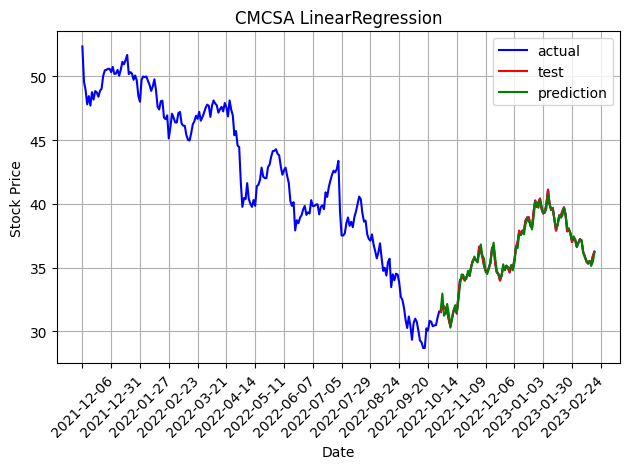

Model: CMCSA LinearRegression
r2_score: 0.9897892160327865
explained_variance_score: 0.9898017788671873
d2_pinball_score: 0.9099348290398801
max_error: 0.9872443224104472
mean_squared_error: 0.0658113752316801
median_absolute_error: 0.14871528619531915
mean_absolute_percentage_error: 0.005287631882876706
mean_poisson_deviance: 0.0018879276965833322
------------




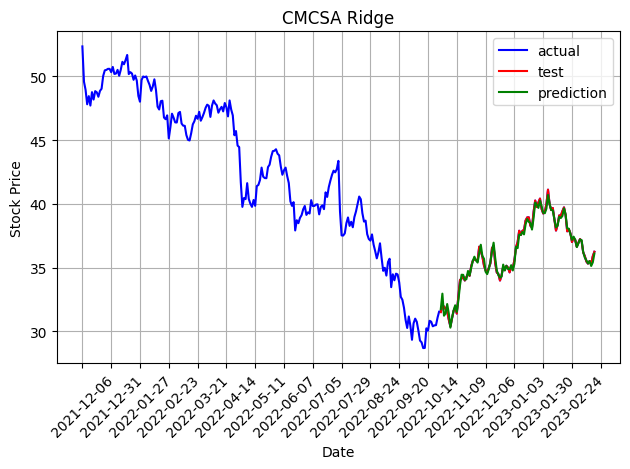

Model: CMCSA Ridge
r2_score: 0.9895166958000927
explained_variance_score: 0.9896166756320998
d2_pinball_score: 0.9077866970897134
max_error: 0.9809246781509273
mean_squared_error: 0.06756784479852446
median_absolute_error: 0.14051100480016743
mean_absolute_percentage_error: 0.005399342761916362
mean_poisson_deviance: 0.0019313345566587259
------------




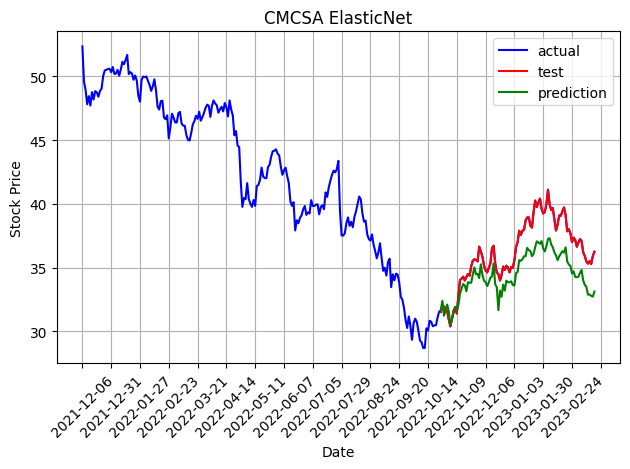

Model: CMCSA ElasticNet
r2_score: 0.3056561349040734
explained_variance_score: 0.8188834380235027
d2_pinball_score: 0.10580308426785334
max_error: 3.8608996733074292
mean_squared_error: 4.475241547795975
median_absolute_error: 2.0248194479262906
mean_absolute_percentage_error: 0.05002608479100417
mean_poisson_deviance: 0.1239843689891858
------------




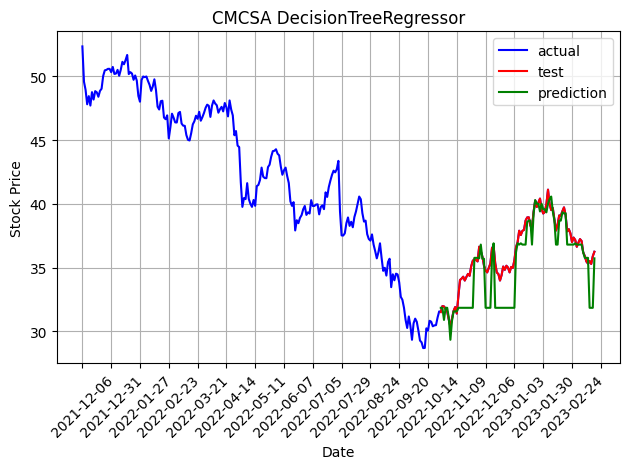

Model: CMCSA DecisionTreeRegressor
r2_score: 0.5310997827109752
explained_variance_score: 0.7168686015149618
d2_pinball_score: 0.4058622905442142
max_error: 4.050000000000001
mean_squared_error: 3.0221938144329905
median_absolute_error: 0.6400000000000006
mean_absolute_percentage_error: 0.0349413384280013
mean_poisson_deviance: 0.09100143555107704
------------




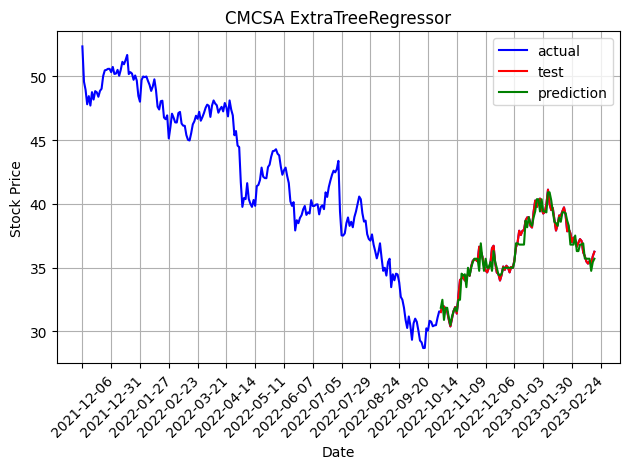

Model: CMCSA ExtraTreeRegressor
r2_score: 0.9524256768045565
explained_variance_score: 0.9537643181515519
d2_pinball_score: 0.8070782462557462
max_error: 1.8999999999999986
mean_squared_error: 0.30662989690721676
median_absolute_error: 0.28000000000000114
mean_absolute_percentage_error: 0.011017431332039758
mean_poisson_deviance: 0.0084853171155006
------------




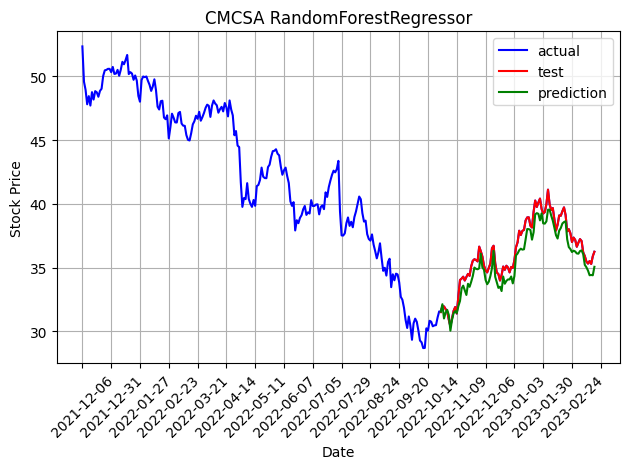

Model: CMCSA RandomForestRegressor
r2_score: 0.8598520028168829
explained_variance_score: 0.9693099754708044
d2_pinball_score: 0.590252088379223
max_error: 1.7091999999999956
mean_squared_error: 0.9032932691752508
median_absolute_error: 0.8637000000000299
mean_absolute_percentage_error: 0.023365848431776418
mean_poisson_deviance: 0.025073930941329287
------------




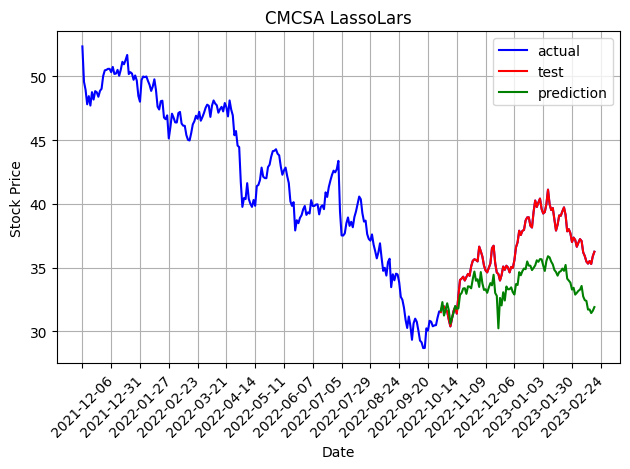

Model: CMCSA LassoLars
r2_score: -0.46282190057964945
explained_variance_score: 0.6286576202273335
d2_pinball_score: -0.296990581624037
max_error: 5.224358147717837
mean_squared_error: 9.4282986796398
median_absolute_error: 3.1396547230894214
mean_absolute_percentage_error: 0.07250969082088447
mean_poisson_deviance: 0.26714501880420893
------------




In [7]:

ticker_symbol = 'CMCSA'

candle_csv_file_path = './data/candlestick_data.csv'

daily_stock_df = pd.read_csv(candle_csv_file_path, header = 0).sort_values(by=['unix_time'])

daily_stock_df = daily_stock_df[daily_stock_df['symbol'] == ticker_symbol].drop('date', axis=1).drop('symbol', axis = 1)

data_x = daily_stock_df.loc[:,daily_stock_df.columns != 'close' ]
data_y = daily_stock_df['close']

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, shuffle=False, random_state=1)

models = [LinearRegression(), Ridge(), ElasticNet(), DecisionTreeRegressor(), ExtraTreeRegressor(), RandomForestRegressor(), LassoLars()]
prediction_list = []

for model in models:
    prediction = generate_prediction(model, x_train, y_train, x_test)
    prediction_list.append([prediction, ticker_symbol + " " + str(model)[:-2]])

for prediction in prediction_list:
    plot_graph(daily_stock_df, x_test, y_test, prediction[0], prediction[1])
    calculate_metrics(y_test, prediction[0], prediction[1])


/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.59497e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


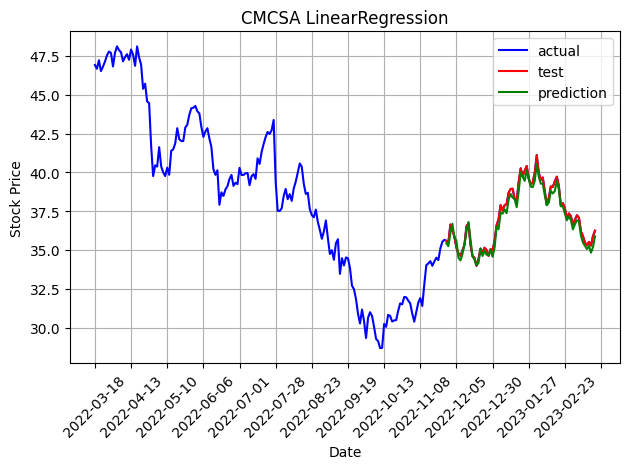

Model: CMCSA LinearRegression
r2_score: 0.9679205051693003
explained_variance_score: 0.9855039480199588
d2_pinball_score: 0.8248421118661056
max_error: 0.7096639783979555
mean_squared_error: 0.11244624291504218
median_absolute_error: 0.2702727501357529
mean_absolute_percentage_error: 0.007648406879095104
mean_poisson_deviance: 0.0030131228885994688
------------




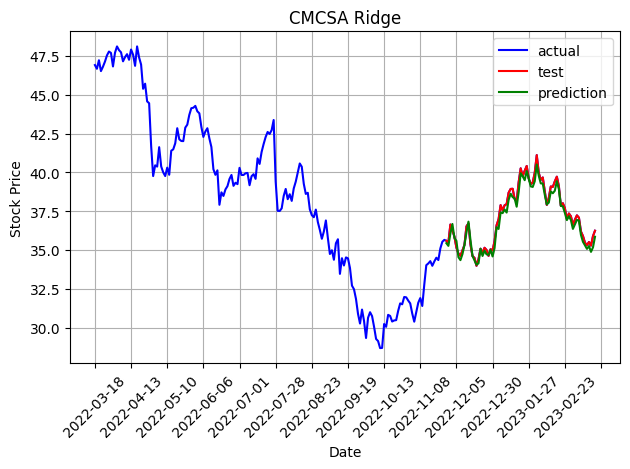

Model: CMCSA Ridge
r2_score: 0.9690025884058411
explained_variance_score: 0.9855574654027651
d2_pinball_score: 0.8288835621212836
max_error: 0.7224151489113098
mean_squared_error: 0.10865328435654542
median_absolute_error: 0.2736182138708969
mean_absolute_percentage_error: 0.007468212930513401
mean_poisson_deviance: 0.002907252287558132
------------




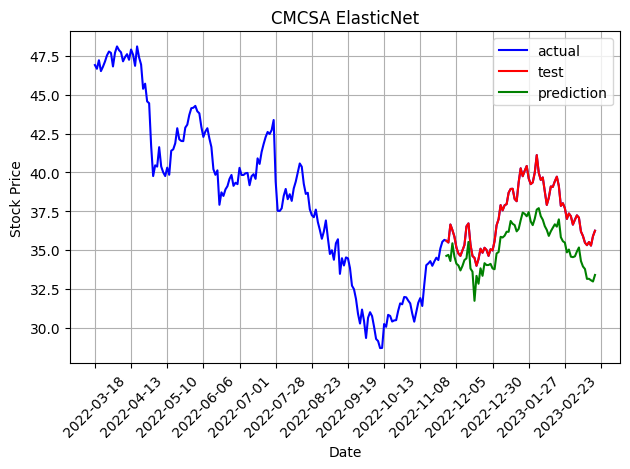

Model: CMCSA ElasticNet
r2_score: -0.2752226878474269
explained_variance_score: 0.8548553411141386
d2_pinball_score: -0.2193315696480007
max_error: 3.5097414090666774
mean_squared_error: 4.4699581737564795
median_absolute_error: 2.0934245167472127
mean_absolute_percentage_error: 0.052970413424096655
mean_poisson_deviance: 0.12303855798579179
------------




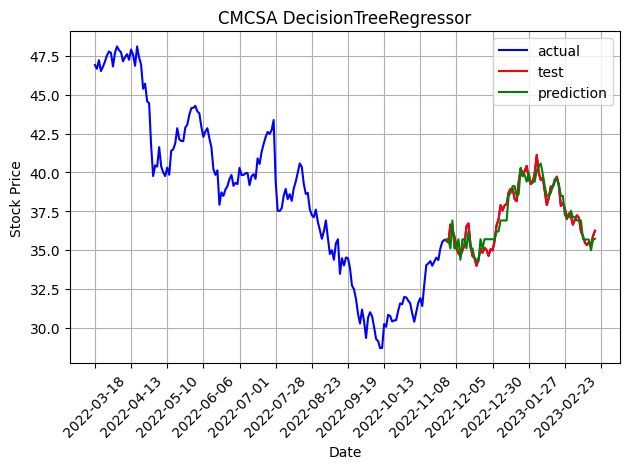

Model: CMCSA DecisionTreeRegressor
r2_score: 0.9087700385860702
explained_variance_score: 0.9087749125625858
d2_pinball_score: 0.7215324293416112
max_error: 1.5399999999999991
mean_squared_error: 0.31978266666666627
median_absolute_error: 0.36999999999999744
mean_absolute_percentage_error: 0.012272589231597176
mean_poisson_deviance: 0.00866469096216747
------------




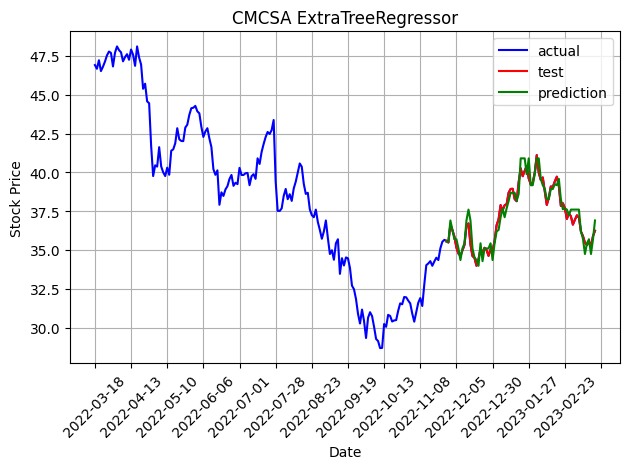

Model: CMCSA ExtraTreeRegressor
r2_score: 0.9271684123718871
explained_variance_score: 0.9289881705901926
d2_pinball_score: 0.7578010129063879
max_error: 1.5499999999999972
mean_squared_error: 0.25529199999999963
median_absolute_error: 0.37000000000000455
mean_absolute_percentage_error: 0.010607822830557221
mean_poisson_deviance: 0.006768816637073958
------------




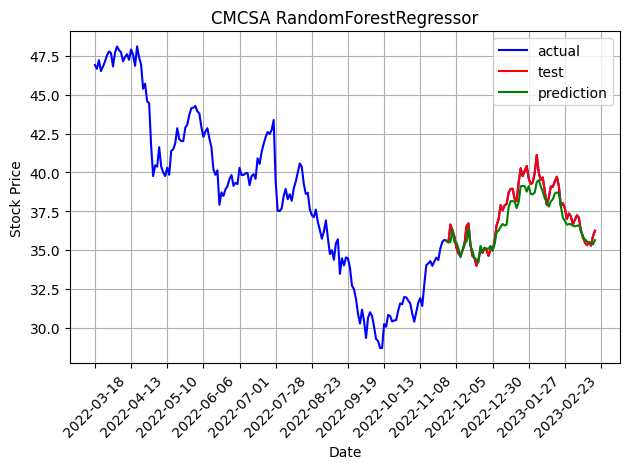

Model: CMCSA RandomForestRegressor
r2_score: 0.8671234762990918
explained_variance_score: 0.9222851765211296
d2_pinball_score: 0.6733858846593777
max_error: 1.7344999999999402
mean_squared_error: 0.46576375159997496
median_absolute_error: 0.45069999999996213
mean_absolute_percentage_error: 0.013977580180847004
mean_poisson_deviance: 0.012262160733757051
------------




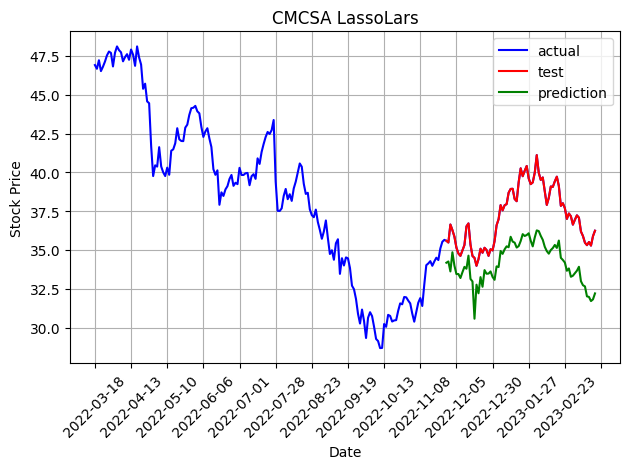

Model: CMCSA LassoLars
r2_score: -1.8377422826049505
explained_variance_score: 0.7183069091132733
d2_pinball_score: -0.8338010047953155
max_error: 4.8499231759664525
mean_squared_error: 9.946960191365422
median_absolute_error: 3.2015004898726716
mean_absolute_percentage_error: 0.07970147070448695
mean_poisson_deviance: 0.279849736749667
------------




In [8]:
ticker_symbol = 'CMCSA'

candle_csv_file_path = './data/technical_indicators_data.csv'

daily_stock_df = pd.read_csv(candle_csv_file_path, header = 0).sort_values(by=['unix_time'])

daily_stock_df = daily_stock_df[daily_stock_df['symbol'] == ticker_symbol].drop('date', axis=1).drop('symbol', axis = 1)

data_x = daily_stock_df.loc[:,daily_stock_df.columns != 'close' ]
data_y = daily_stock_df['close']

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, shuffle=False, random_state=1)

models = [LinearRegression(), Ridge(), ElasticNet(), DecisionTreeRegressor(), ExtraTreeRegressor(), RandomForestRegressor(), LassoLars()]
prediction_list = []

for model in models:
    prediction = generate_prediction(model, x_train, y_train, x_test)
    prediction_list.append([prediction, ticker_symbol + " " + str(model)[:-2]])

for prediction in prediction_list:
    plot_graph(daily_stock_df, x_test, y_test, prediction[0], prediction[1])
    calculate_metrics(y_test, prediction[0], prediction[1])